## EE 242 Lab 2 – Convolution

Jordan White, Ismail Mangrani 

(This should be a markup cell, which means that when you run it you just get formated text.)

In [1]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io
from scipy.io import wavfile as wav
import simpleaudio as sa
from scipy import ndimage
from skimage import color
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, you will work through a series of exercises involving convolution of time signals and images.  This is a two-week lab.  You should plan on completing the first 3 assignments in the first week.

## Lab 2 turn in checklist

•	Pre-lab (upload to canvas before lab)

•	Lab 1 Jupyter notebook with code for the first 4 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

•	1 individual Jupyter notebook with code + markdown cells for the last exercise

Note: The pre-lab should be done individually, and all other assignments should be completed in groups of 3-4 people.


## Assignment 1 -- Simple Convolutions

In [5]:
# Assignment 1 - Time Scaling Function

# Part A

# Create three discrete-time signals, assuming a time range of [0,12]
# x: input signal vector, a box of height 1 starting at time n=2 and ending at n=8
# h1: a pulse of length 4 & height 1 starting at time 0
# h2 = 1 at n=0, -1 at n=1, and 0 otherwise

time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x = np.array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])
h1 = np.array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
h2 = np.array([1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


# Part B
# Find the responses y1=x*h1 and y2=x*h2

y1 = np.convolve(x, h1)
y2 = np.convolve(x, h2)

# Part C
# Plot x, y1 and y2 in a 3x1 plot
nx = np.arange(0, len(x), 1)
ny1 = np.arange(0, len(y1), 1)
ny2 = np.arange(0, len(y2), 1)

fig = plt.figure(3, figsize = (8, 8))

plt.subplot(311)
plt.stem(nx, x)
plt.title('x(t)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.xlim(0, 20)
plt.ylim(-2, 5)

plt.subplot(312)
plt.stem(ny1, y1)
plt.title('y1(t)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.xlim(0, 20)
plt.ylim(-2, 5)

plt.subplot(313)
plt.stem(ny2, y2)
plt.title('y2(t)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.xlim(0, 20)
plt.ylim(-2, 5)
# plt.show()


<ipython-input-5-ade100573ab3>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(311)
<ipython-input-5-ade100573ab3>:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(312)
<ipython-input-5-ade100573ab3>:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.

(-2.0, 5.0)

###  Discussion

Comment on what aspects of the input signal correspond to the largest values of y1[n] and y2[n] 

for y1, the middle of x1 corresponds to the largest values of y1. For the y2, the edges of x1 correspond to the largest values of y2

## Assignment 2 -- Smoothing Signals

<IPython.core.display.Javascript object>


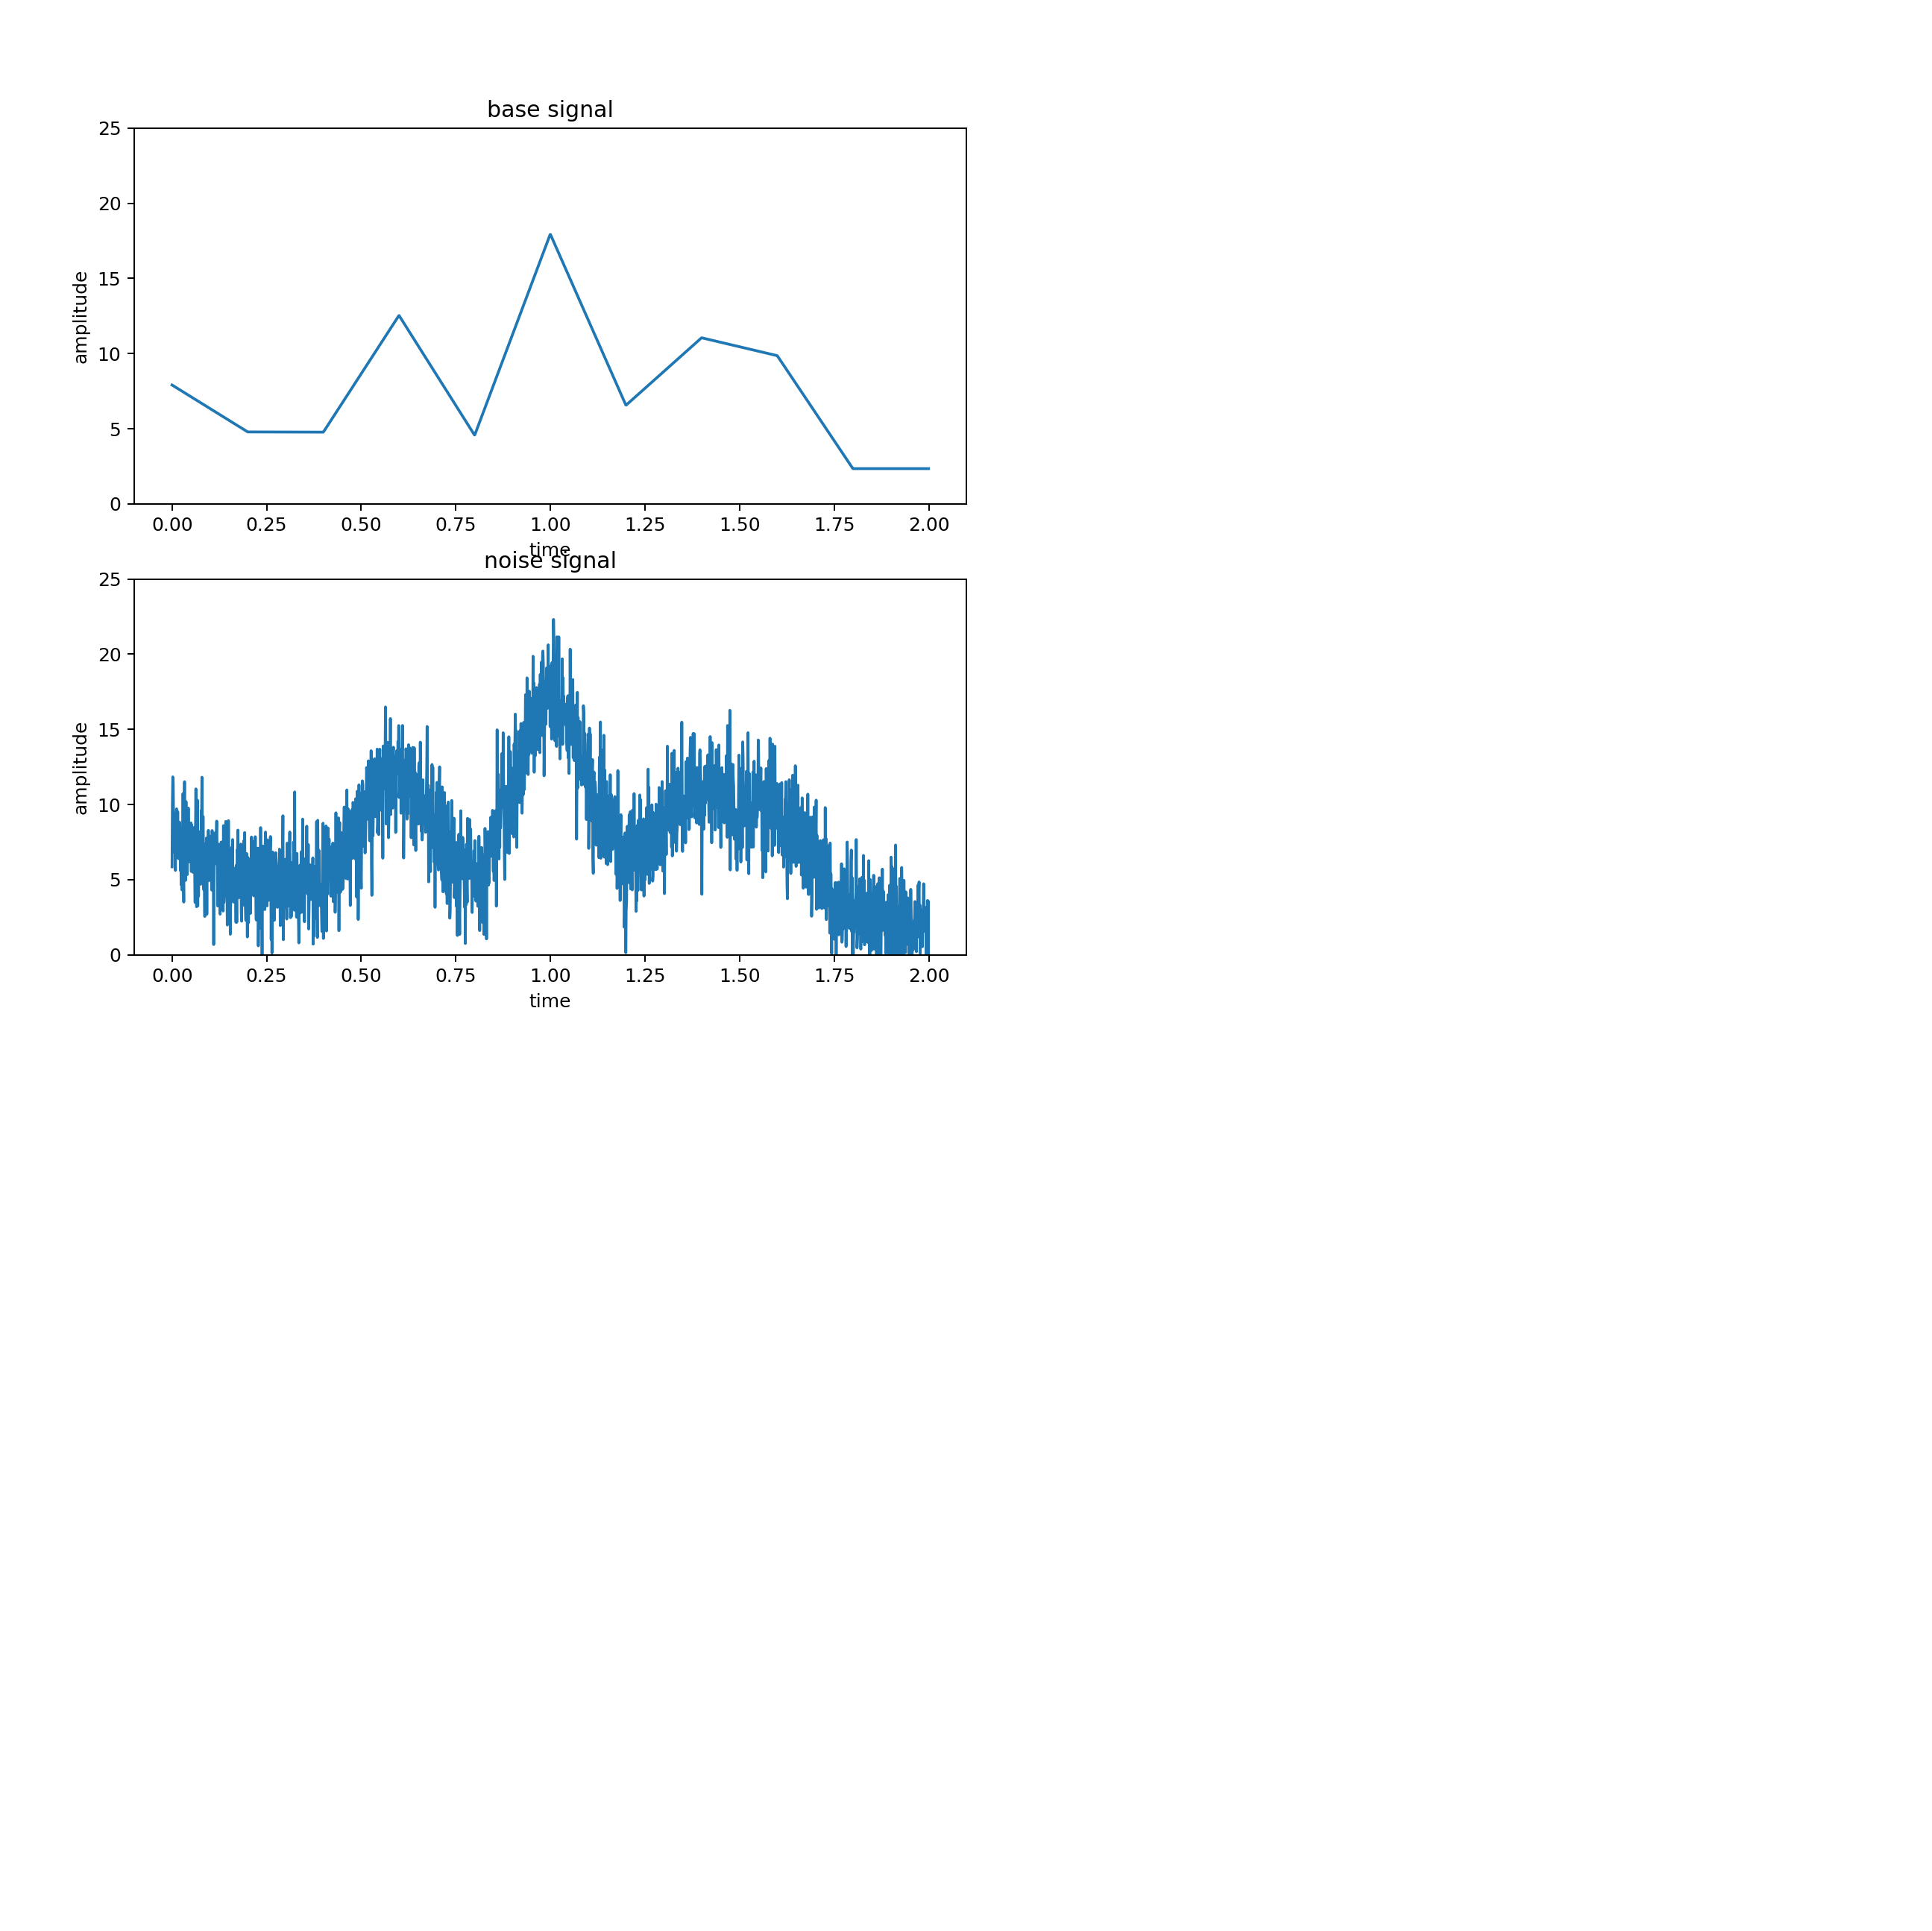

<IPython.core.display.Javascript object>


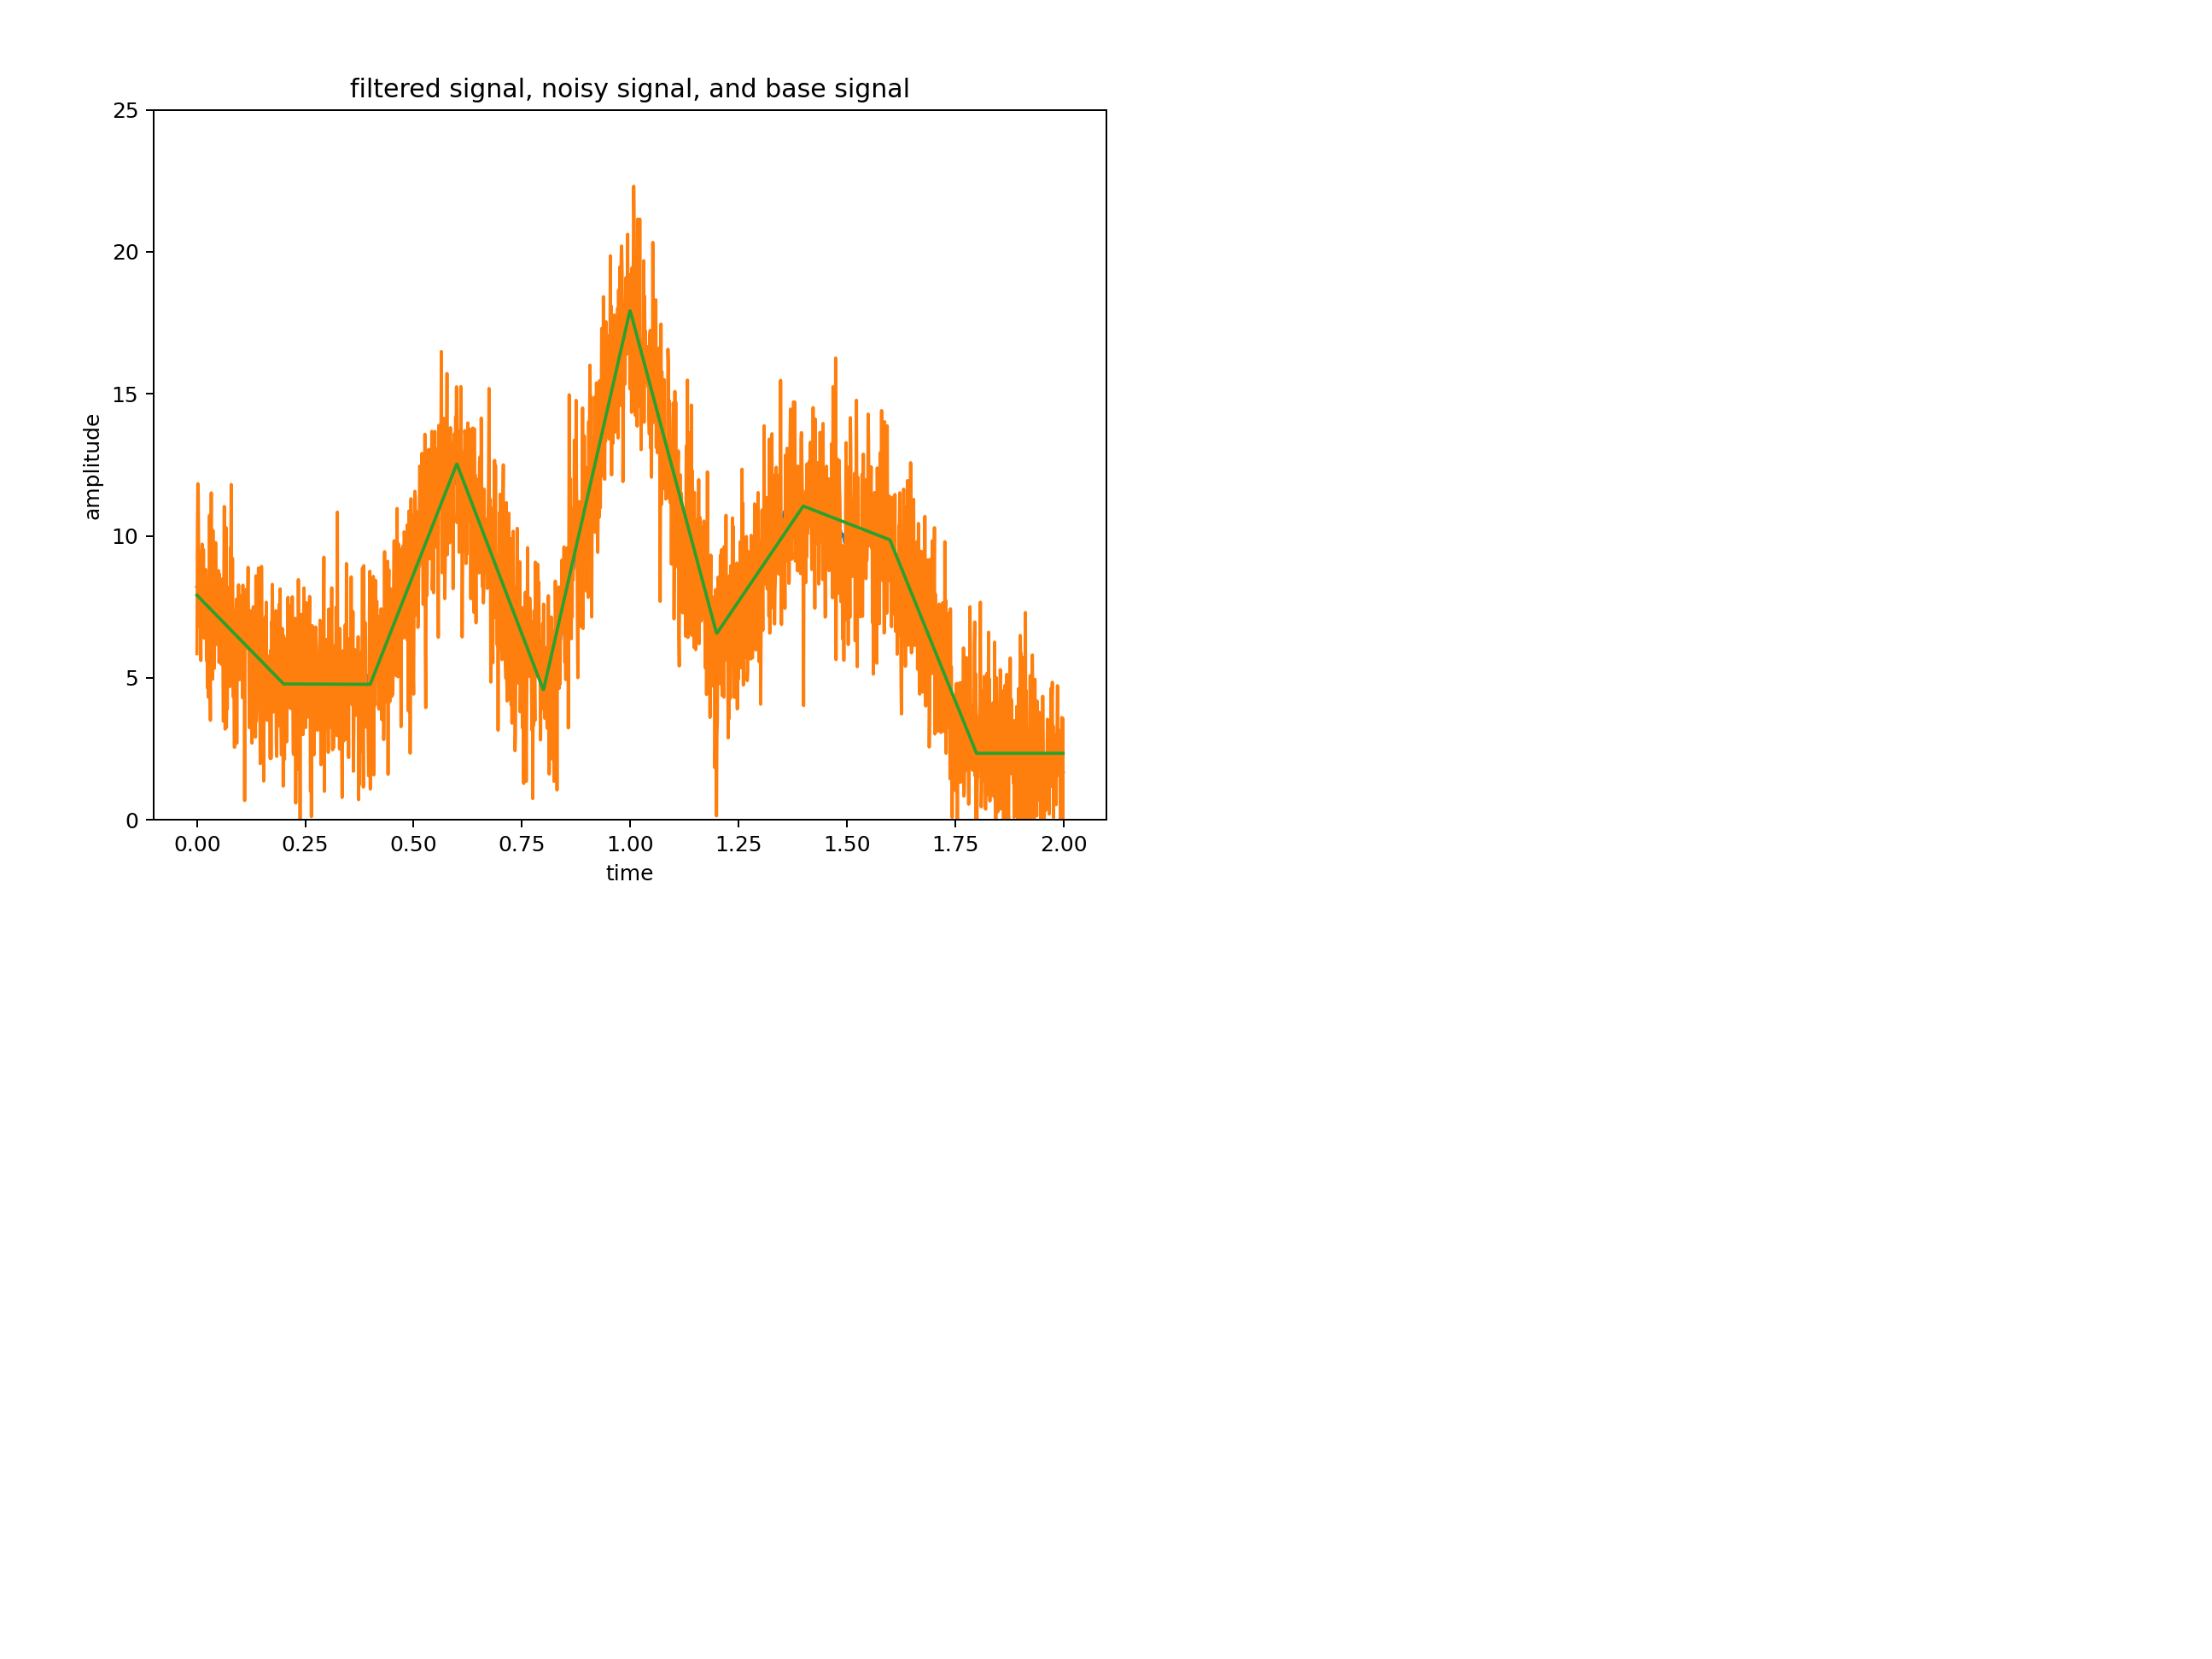

<ipython-input-3-13a0ed01c365>:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(111)
<ipython-input-3-13a0ed01c365>:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(111)


<IPython.core.display.Javascript object>


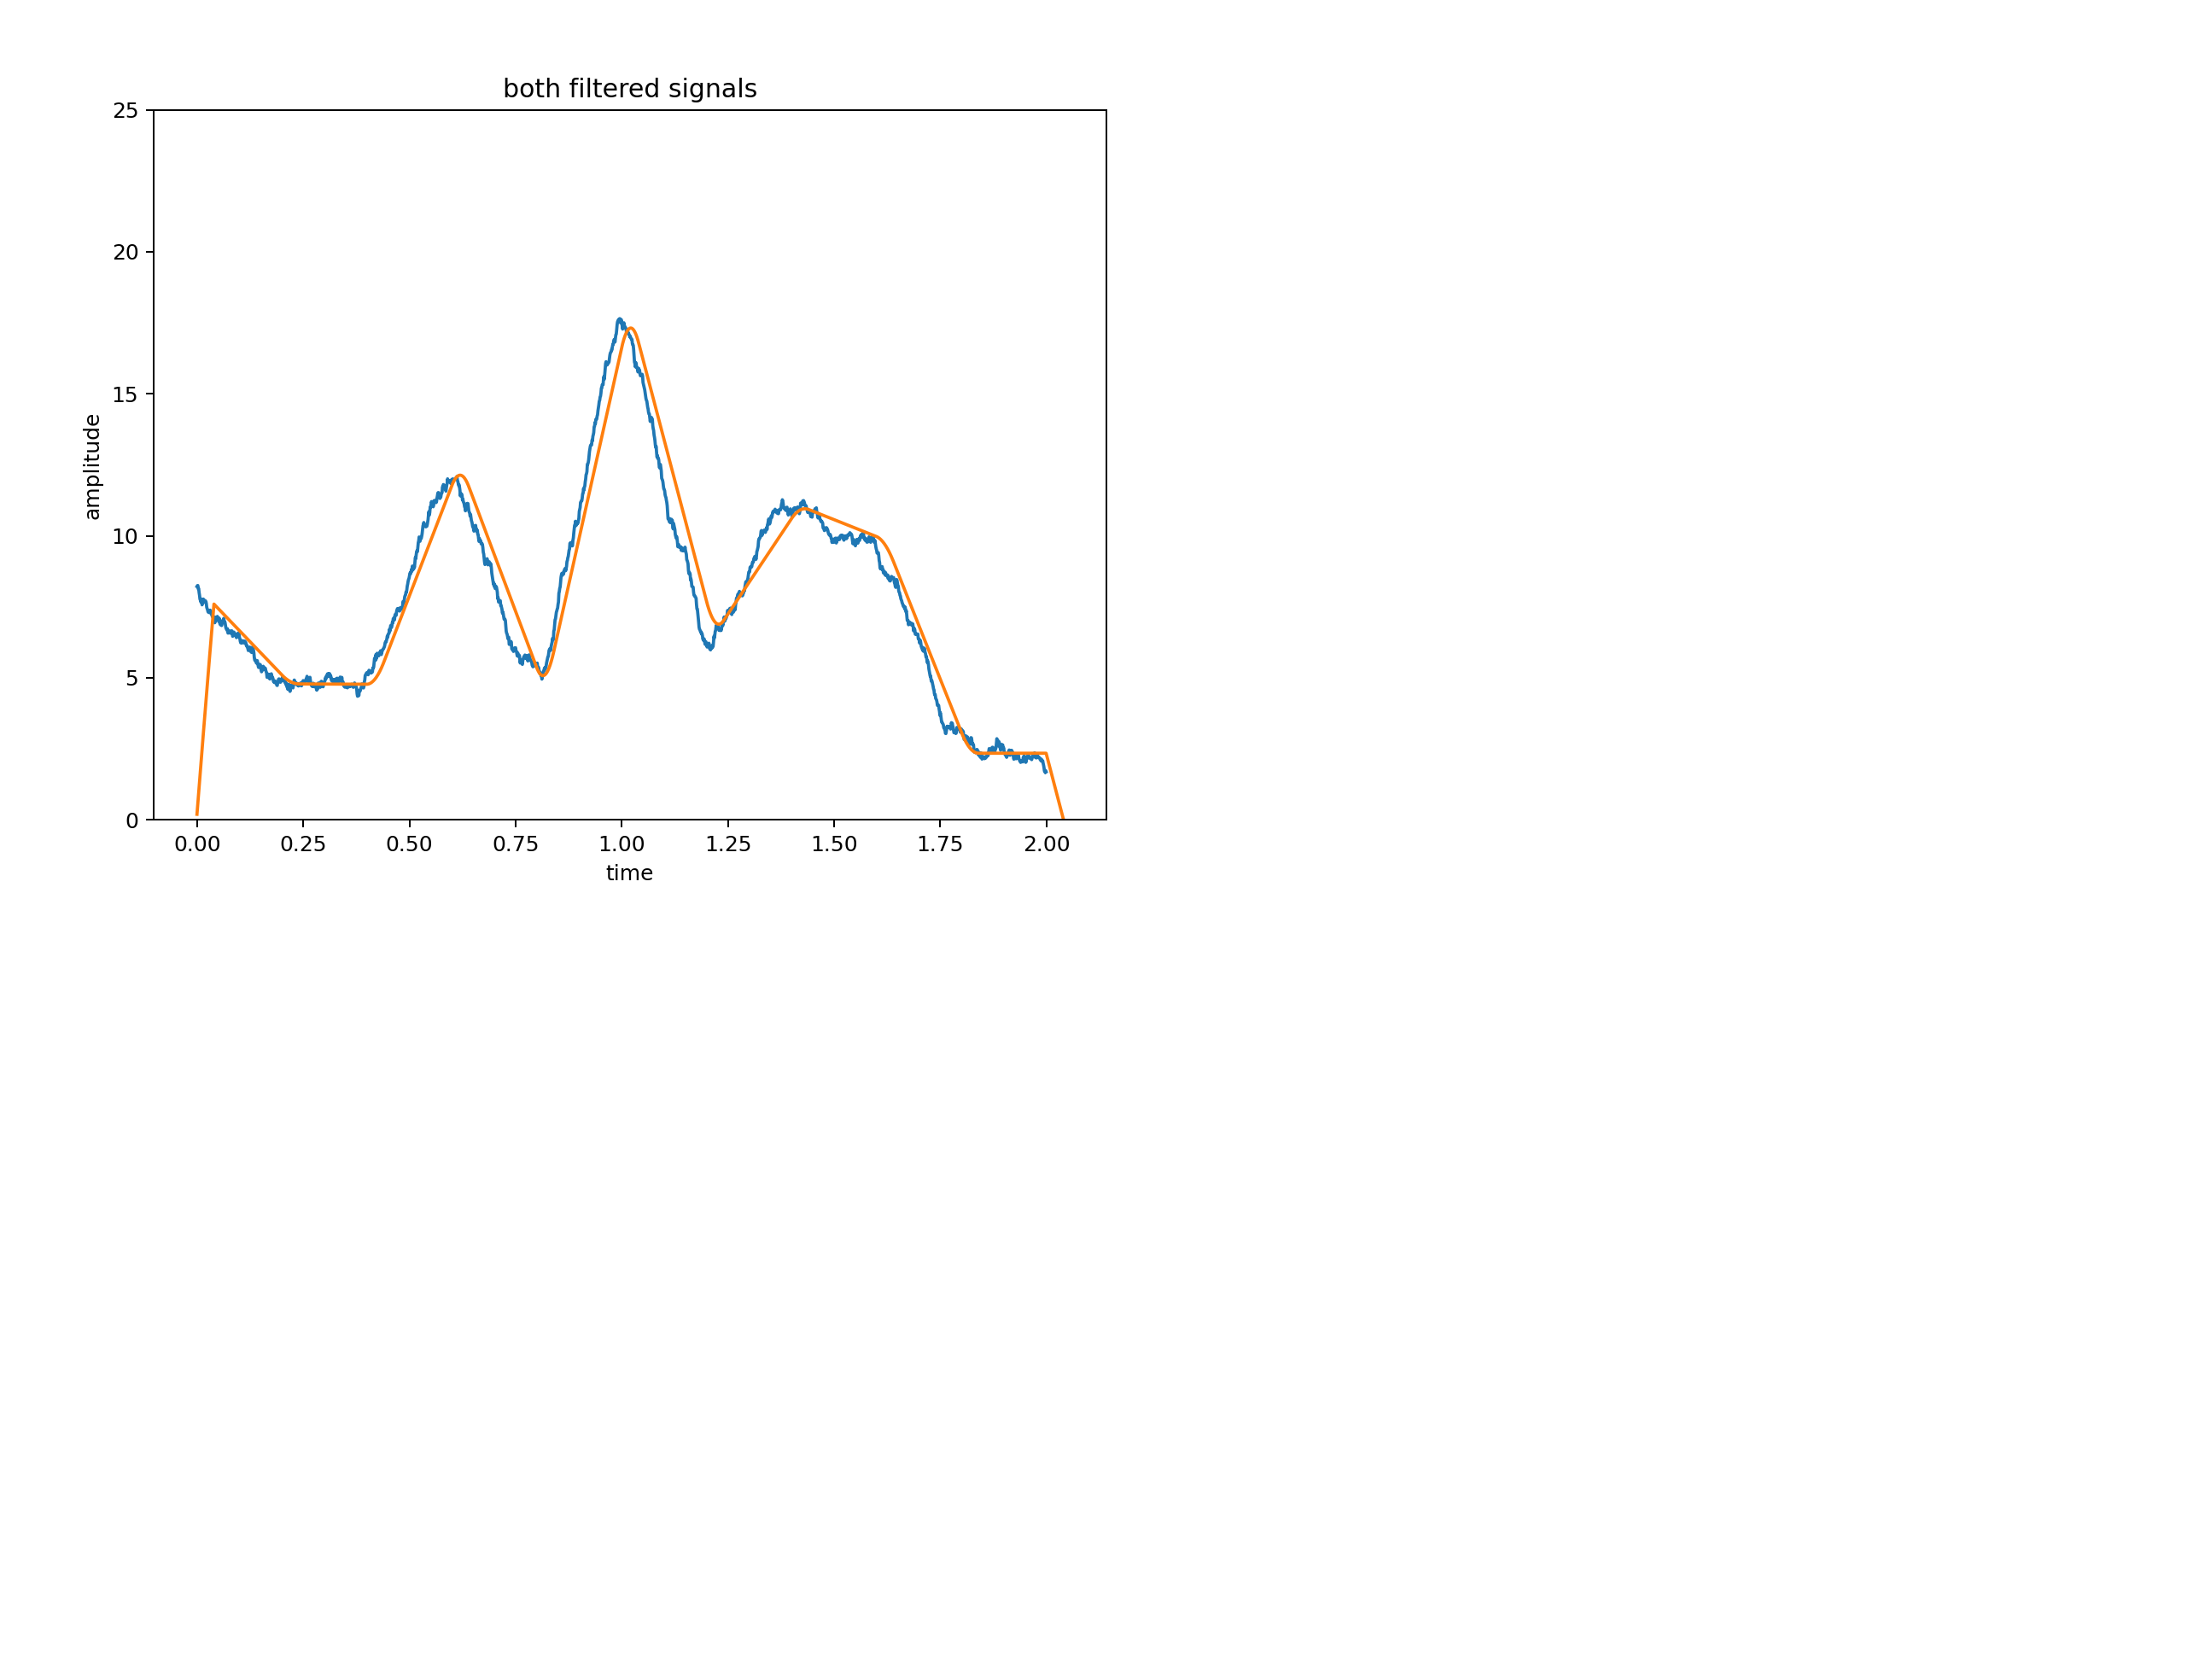

<ipython-input-3-13a0ed01c365>:82: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(111)


In [3]:
# Assignment 2 - Amplitude Operations on Signals

# Part A
# set up relevant parameters
srate = 1000 # sampling rate in Hz
time  = np.arange(0,2,1/srate) # associated time vector that corresponds to 2 seconds
n     = len(time) # length of the time vector

# here is a base signal to work with, values of signal points chosen randomly
p     = 10 # points for piecewise linear signal
amp = 20   # amplitude range of base signal
base = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*amp)

# create some random noise to be added to the abve base signals
noiseamp = 2
noise  = noiseamp * np.random.randn(n)

# add noise to the base signals to create new noisy signals
noise_signal = np.add(base, noise)

fig = plt.figure(4, figsize = (8, 8))

plt.subplot(211)
plt.plot(time, base)
plt.title('base signal')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.ylim(0, 25)

plt.subplot(212)
plt.plot(time, noise_signal)
plt.title('noise signal')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.ylim(0, 25)

# Part B
# implement the running mean filter with a for loop
filtsig1 = np.zeros(len(noise_signal))
iter = len(noise_signal)
for t in range(iter):
    if t < 20:
        filtsig1[t] = np.mean(noise_signal[0:t + 20])
    elif (t >= 20 and t <= len(noise_signal) - 21):
        filtsig1[t] = np.mean(noise_signal[t - 20: t + 20])
    else:
        filtsig1[t] = np.mean(noise_signal[t - 20: len(noise_signal)])
        

fig = plt.figure(5, figsize = (8, 6))

plt.subplot(111)
plt.plot(time, filtsig1)
plt.title('filtered signal, noisy signal, and base signal')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.ylim(0, 25)

plt.subplot(111)
plt.plot(time, noise_signal)

plt.subplot(111)
plt.plot(time, base)

        

# Part C
# implement smoothing using convolution
hfilt = np.full(41,1) / 41
filtsig2 = np.convolve(base, hfilt)
new_t = np.arange(0, len(filtsig2)/srate, 1/srate)

fig = plt.figure(6, figsize = (8, 6))

plt.subplot(111)
plt.plot(time, filtsig1)
plt.title('both filtered signals')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.ylim(0, 25)

plt.subplot(111)
plt.plot(new_t, filtsig2)



###  Discussion

Describe the differences in the results using the two methods and explain these differences in terms of system properties. Comment on how the results and plots change when you amplify the noise more and also change the value of k. 

The first method averages the 20 samples before and after the resultant value while the second method convolves and averages up to 40 samples for the resultant value, the first method is less smooth than the second. A smaller k would make the graph less smooth, and amplifying the noise makes the filtered signal less accurate. Also when amplifying noise, the convolving method maintains smoothness in the graph while the averaging method gains more jagged edges.

## Assignment 3 -- Removing Noise from an Audio Signal 

In [2]:
# Assignment 3 -- Title of assignment 3

# Part A
fs, tr_orig = wav.read('trombone11.wav')
noise_seq = np.arange(0, len(tr_orig), 1) * 1.0 / fs
noise_amounts = np.zeros(len(tr_orig))

for n in range(len(tr_orig)):
    noise_amounts[n] = 100 * np.random.randn()
    
tr_noisy = np.add(tr_orig, noise_amounts)
wav.write('tr_noisy.wav', fs, tr_noisy.astype('int16'))

# Part B
hfilt = np.full(41,1) / 41
tr_filt = np.convolve(tr_noisy, hfilt)
wav.write('tr_filt.wav', fs, tr_filt.astype('int16'))

# Part C
orig_sa = sa.WaveObject.from_wave_file('trombone11.wav')
play_object = orig_sa.play()
play_object.wait_done()

tr_noisy_sa = sa.WaveObject.from_wave_file('tr_noisy.wav')
play_tr_noisy = tr_noisy_sa.play()
play_object.wait_done()

tr_filt_sa = sa.WaveObject.from_wave_file('tr_filt.wav')
play_tr_filt = tr_filt_sa.play()
play_object.wait_done()

FileNotFoundError: [Errno 2] No such file or directory: 'trombone11.wav'

###  Discussion

The original signal sounds very clear while the noise removed signal sounded quieter and had lower quality but was noiseless. A large k value makes the signal less accurate and more different than the original signal

## Assignment 4 -- Convolution with Images

In [47]:
# Part A
def edge_detect(img):
    kernel_one = [[1, 0, -1], [2, 0, -2], [1, 0, -1]]
    kernel_two = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]
    horiz = ndimage.filters.convolve(img, kernel_one)
    vert = ndimage.filters.convolve(img, kernel_two)
    combined = np.sqrt(np.power(horiz, 2) + np.power(vert, 2))
    return horiz, vert, combined

<IPython.core.display.Javascript object>


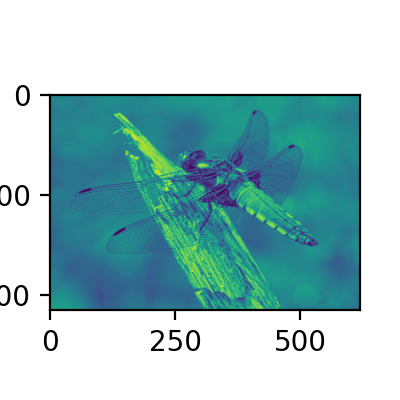

<IPython.core.display.Javascript object>


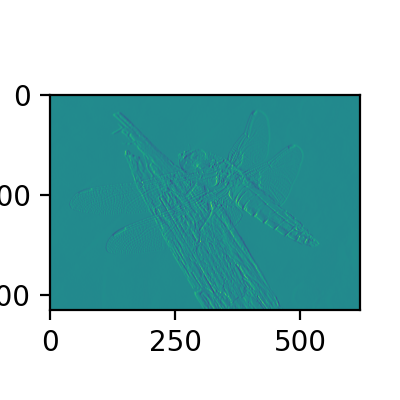

<IPython.core.display.Javascript object>


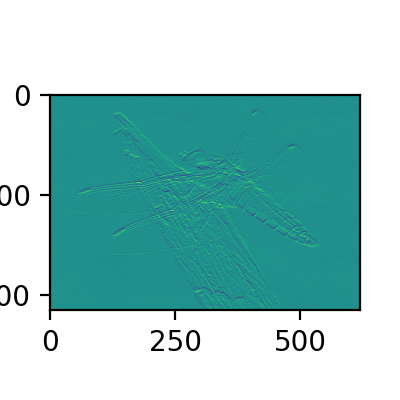

<IPython.core.display.Javascript object>


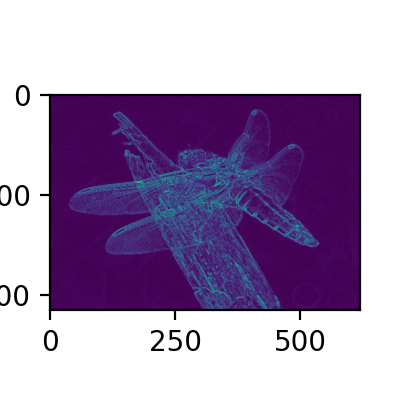

<IPython.core.display.Javascript object>


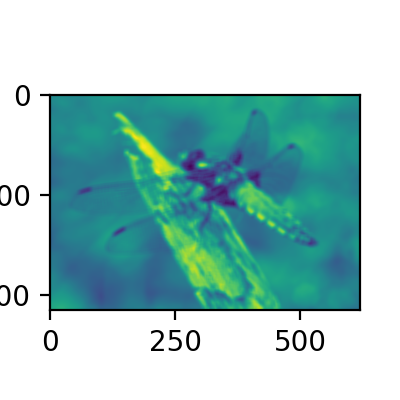

<IPython.core.display.Javascript object>


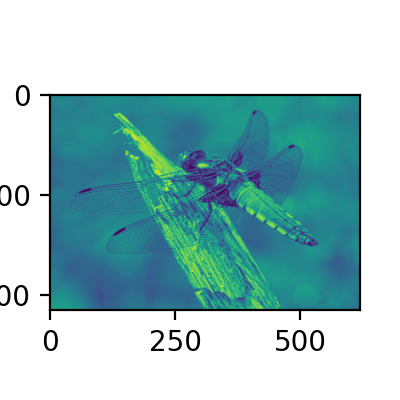

<IPython.core.display.Javascript object>


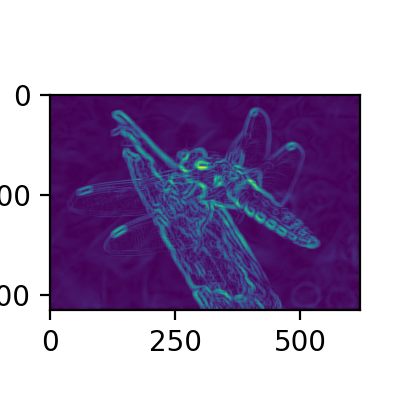

<IPython.core.display.Javascript object>


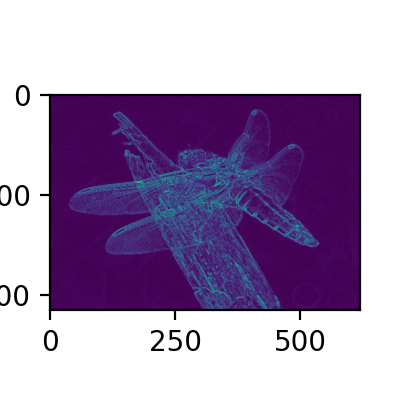

In [61]:
# Part B
image = color.rgb2gray(plt.imread('dragonfly.jpeg'))
image_horiz, image_vert, image_combined = edge_detect(image)

fig = plt.figure(figsize = (2, 2))
imgplot_1 = plt.imshow(image)
fig2 = plt.figure(figsize = (2, 2))
imgplot_2 = plt.imshow(image_horiz)
fig3 = plt.figure(figsize = (2, 2))
imgplot_3 = plt.imshow(image_vert)
fig4 = plt.figure(figsize = (2, 2))
imgplot_4 = plt.imshow(image_combined)



# Part C
kernel_ten = np.ones((10, 10))*0.01
smoothed_img = ndimage.convolve(image, kernel_ten)
fig5 = plt.figure(figsize = (2, 2))
imgplot_5 = plt.imshow(smoothed_img)
fig6 = plt.figure(figsize = (2, 2))
imgplot_6 = plt.imshow(image)


# Part D
image_horiz_smooth, image_vert_smooth, image_combined_smooth = edge_detect(smoothed_img)
fig7 = plt.figure(figsize = (2, 2))
imgplot_1 = plt.imshow(image_combined_smooth)
fig8 = plt.figure(figsize = (2, 2))
imgplot_1 = plt.imshow(image_combined)

### Discussion

Using the edge detector on the original produces crisp edges in the output image while using edge detection on the smoothed image provided thicker edges that were blurrier. Using a larger size smoothing filter will make the image blurrier and the edges thicker and less distinct